## Final Project Submission

Please fill out:
* Student name: Bram Tunggala
* Student pace: full time
* Scheduled project review date/time: 03/08/19 @3:00pm
* Instructor name: Brandon Lewis
* Blog post URL:


## KC Housing Data 

## Obtain Our Data 
- Import necessary libraries and tools that will be used

In [14]:
#Importing libraries I will be using 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('seaborn')
%matplotlib inline 

In [15]:
#pulling database and converting csv file to a pandas DataFrame in order to manipulate data effectively and effeciently 
df = pd.read_csv('kc_house_data.csv')

#checking data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrubbing Our Data 
- Set columns to the appropriate data types 
- Identify and deal with null values 
- Check for and deal with multicollinearity, if needed
(essentially "srubbing" or "formatting" our data)

In [16]:
#checking for null values 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Droping unused columns 

In [17]:
#dropping columns that aren't relevant 
df = df.drop(['id', 'lat', 'long', 'date', 'zipcode', 'yr_renovated', 'yr_built'], axis = 1)

#### Replacing null values 

In [18]:
#replacing null values 
#replacing null values with zero inorder to clean column  


#replaced null values with zero because we don't have a record showing the house had any prior views. 
df['view'] = df['view'].fillna(value=0)

#replaced null values with zero because this was a categorical data.
df['waterfront'] = df.waterfront.fillna(value=0)

#slicing rows in 'sqft_basement' that contains '?' in the values
df = df[df.sqft_basement != '?']
df.head(12)

#checking work
df.sqft_basement.value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
360.0        72
850.0        72
          ...  
1481.0        1
506.0         1
65.0          1
283.0         1
1248.0        1
2570.0        1
2180.0        1
2360.0        1
508.0         1
3260.0        1
2810.0        1
176.0         1
1913.0        1
792.0         1
2310.0        1
3000.0        1
875.0         1
602.0         1
4130.0        1
784.0         1
1880.0        1
915.0         1
2850.0        1
1816.0        1
417.0         1
1798.0        1
2196.0        1
1548.0        1
2120.0        1
1990.0        1
Name: sqft_basement, Len

#### Converting data types

In [19]:
#converting data types
#sqft_basement, convert data type into an interger 
df.sqft_basement = df.sqft_basement.astype('float64')
df.waterfront = df.waterfront.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 14 columns):
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null int64
view             21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(5), int64(9)
memory usage: 2.4 MB


## Exploring Our Data
- Checking for column distribution
- Examine our descriptive statistics 
- Use visualization to better understand our data 

## Which predictors is are the most correlated with price? 
##### Let's explore our data to find out further. 

In [20]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.006716,0.232654,3.409923,7.658279,1789.069006,291.851724,1987.27139,12738.941967
std,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.081679,0.764064,0.650498,1.174253,828.409769,442.498337,685.67034,27169.273663
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.00000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1490.00000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.00000,7626.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,2360.00000,10087.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.00000,871200.000000


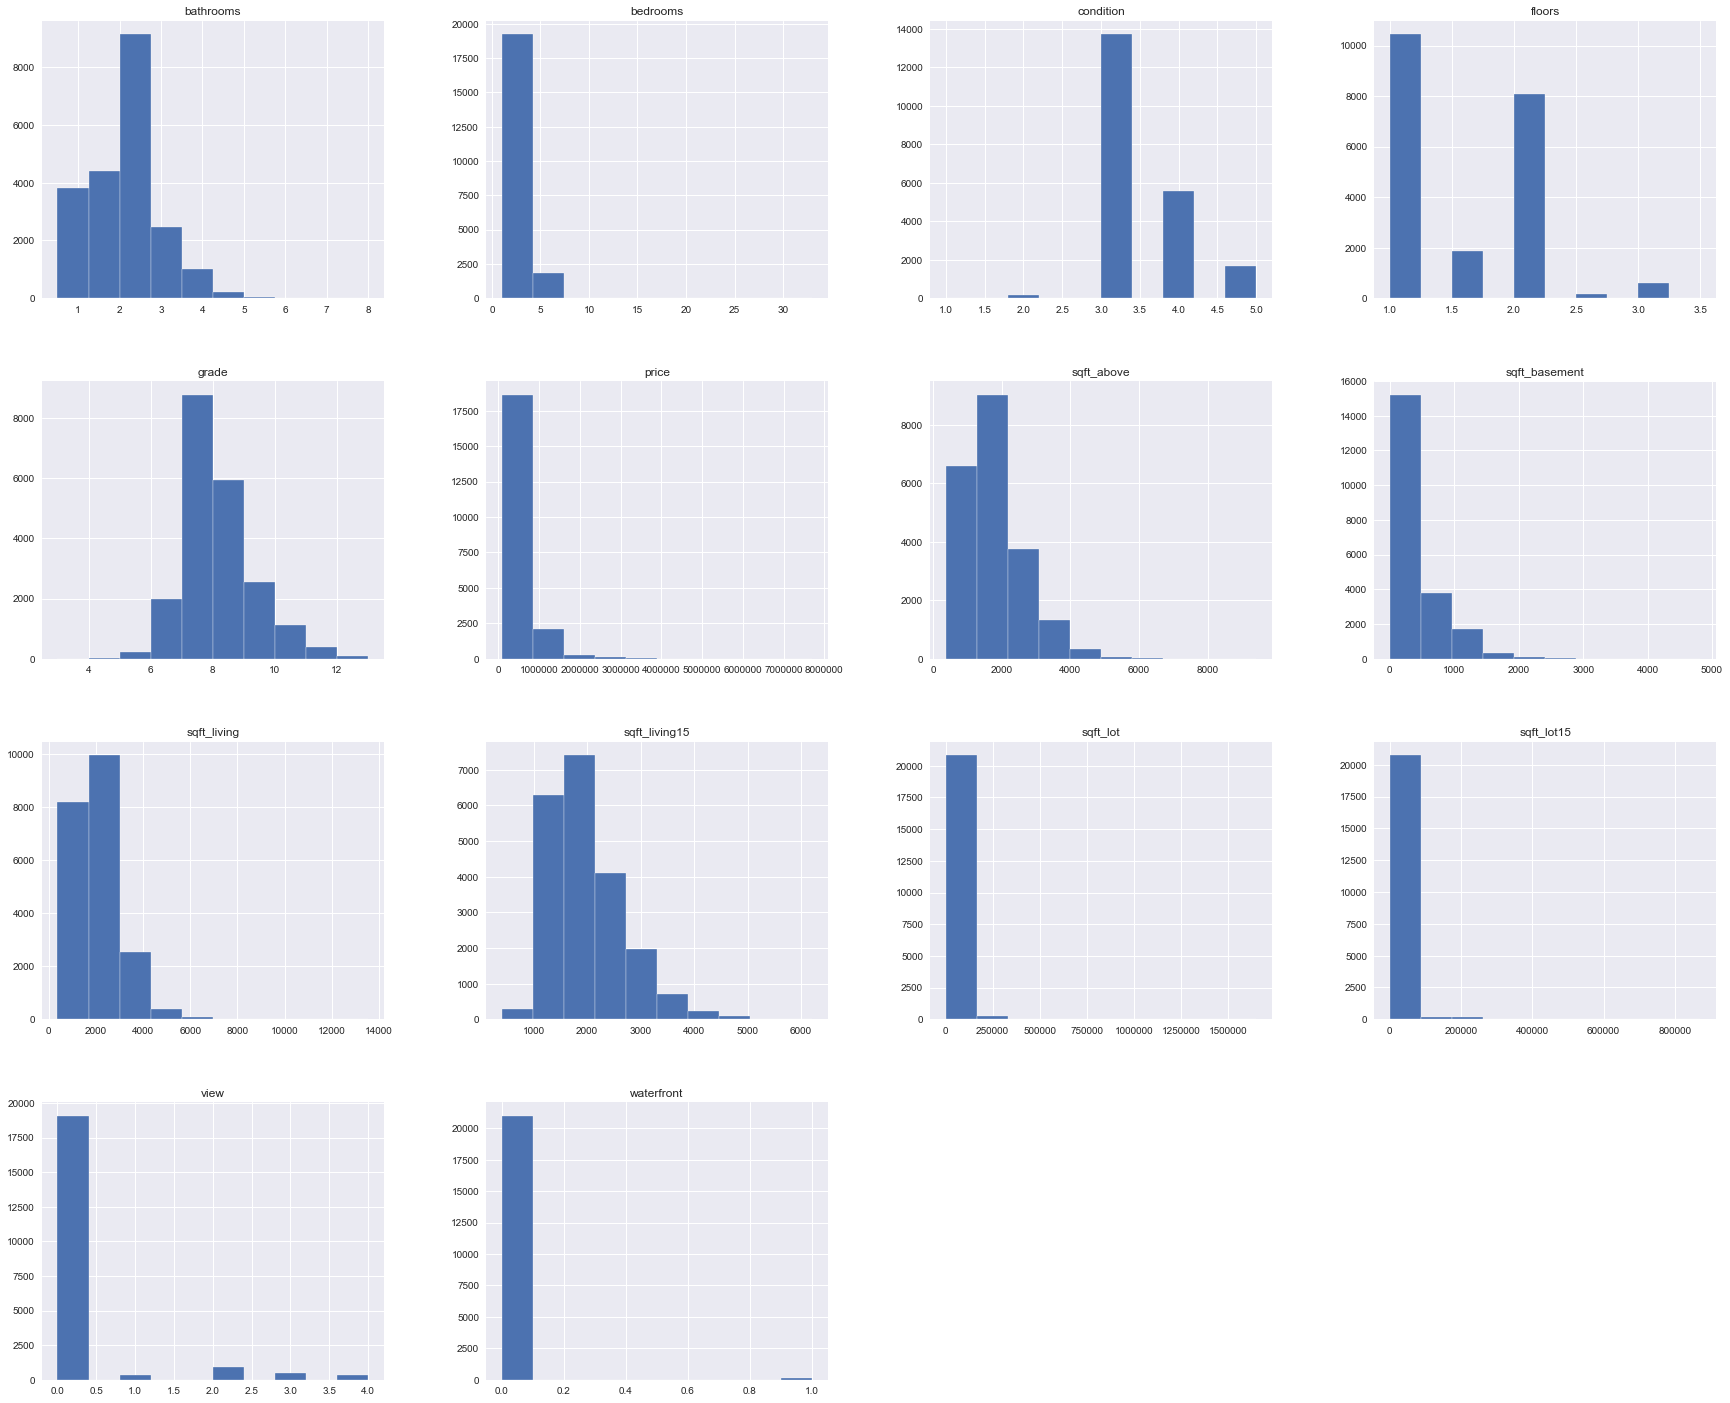

In [21]:
#checking for general distribution for numerical features 
df.hist(figsize= [30,25]);

#### Visualizing correlation using a heatmap
In the below heatmap image, the predictors shows a positve correlation with price. 

Text(0.5, 1.0, 'Heatmap Correlation')

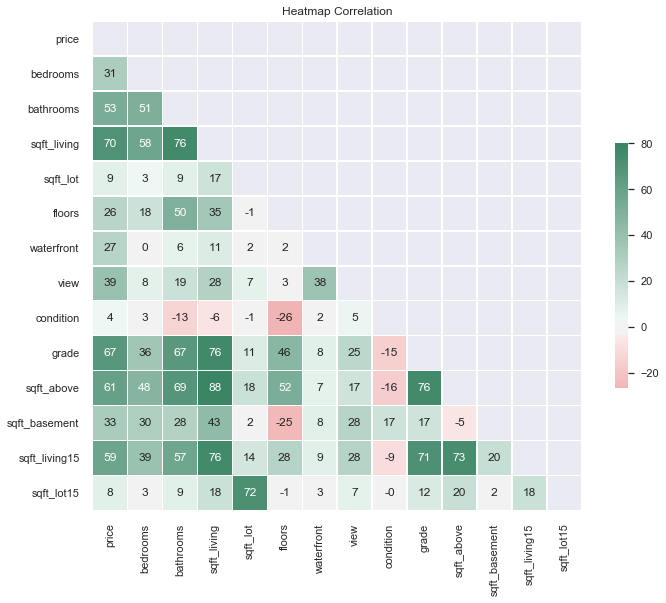

In [22]:
#Heatamp to visualize correleation of df_one 

# Set the style of the visualization
sns.set()

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(12, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr*100, fmt= ".0f",annot= True, mask=mask, cmap=cmap, vmax=80, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});
plt.title('Heatmap Correlation')

In [23]:
#checking to see which predictors are most correlated to price 
df.corr().head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
price,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.394885,0.035290,0.667738,0.605143,0.325008,0.586415,0.083192
bedrooms,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.080208,0.025710,0.356882,0.479210,0.302683,0.392476,0.030479
bathrooms,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,0.186795,-0.128015,0.666493,0.686456,0.282693,0.570129,0.088834
sqft_living,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,0.282950,-0.061294,0.763101,0.876678,0.434576,0.756389,0.184466
sqft_lot,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,0.072420,-0.009671,0.113402,0.183461,0.015533,0.143428,0.720649
floors,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,0.027727,-0.264280,0.459214,0.524225,-0.245144,0.280294,-0.011545
waterfront,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.378926,0.016728,0.083602,0.072201,0.084949,0.085174,0.030250
view,0.394885,0.080208,0.186795,0.282950,0.072420,0.027727,0.378926,1.000000,0.045355,0.249354,0.166610,0.275440,0.280282,0.072555
condition,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,0.045355,1.000000,-0.148508,-0.159289,0.170972,-0.093493,-0.004860
grade,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,0.249354,-0.148508,1.000000,0.756382,0.168023,0.713574,0.121921


### Current Observations 
#### The top three predictors that has the most correlation with price is: 
1. sqft_living - footage of the home
2. grade - overall grade given to the housing unit, based on King County grading system
3. sqft_above - square footage of house apart from basement


## What is the average of the top three predictors?

In [24]:
#The average of the top three predictors are: 
print('sqft_living:', df.sqft_living.mean())
print('grade:', df.grade.mean())
print('sqft_above:', df.sqft_above.mean())

sqft_living: 2080.9207302653363
grade: 7.658279335950433
sqft_above: 1789.069006290498


### Checking for linearity

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


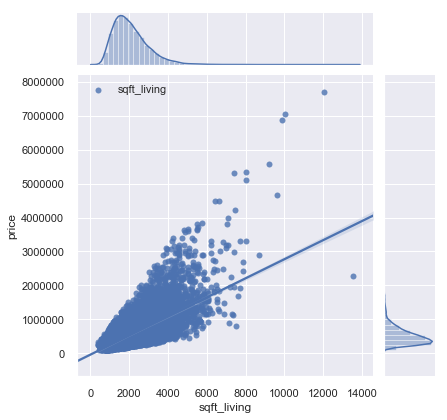

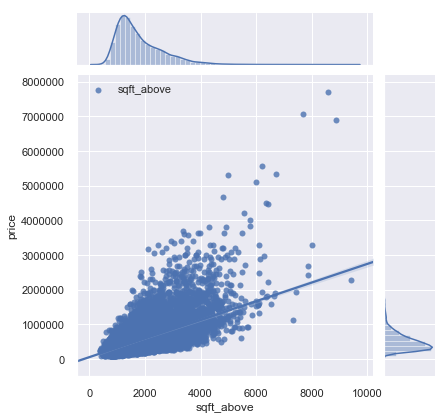

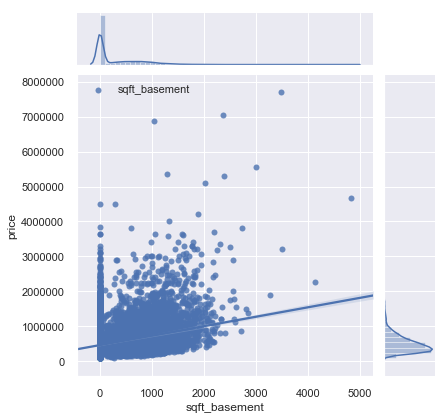

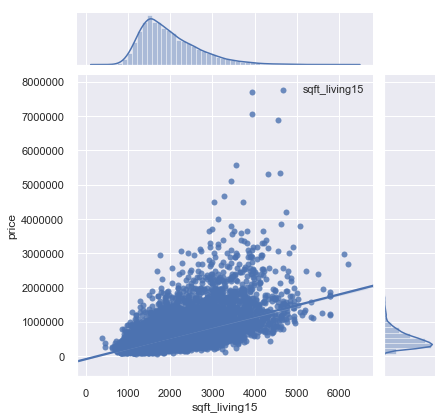

In [25]:
#checking for linearity assumptions between predictors and targets in numerical variables
for i in ['sqft_living', 'sqft_above', 'sqft_basement' , 'sqft_living15']:
    sns.jointplot(x = i, y= 'price', data = df, kind= 'reg' ,label= i)
    
    plt.legend()
    plt.show()


As shown above, the is some linear relationship between predictors and response. We shall expolore further to see its significance. 

## Splitting dataframes into categorical and numerical variables

In [26]:
#categorical
df_cat = pd.DataFrame(df, columns= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade' ])
#numerical
df_num = pd.DataFrame(df, columns= ['price','sqft_living', 'sqft_above', 'sqft_basement' , 'sqft_living15'])

### Normalizing and transforming our variables 
#### Popular transformations:
- Log Transformation: helps reduce skewness 
- Min/Max Scaling: brings values between 0 and 1
- Standardization: will have a mean of 0 and standardeviation of 1 
- Mean Normalization: distribution will have a mean of 0 and values between -1 and 1 


In [27]:
#Normalize and scale numerical variables using 
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
df_num_norm = scaler.fit_transform(df_num)
df_num_scaler = pd.DataFrame(df_num_norm, columns = ['price','sqft_living', 'sqft_above', 'sqft_basement' , 'sqft_living15'])
df_num_scaler.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,price,sqft_living,sqft_above,sqft_basement,sqft_living15
0,-0.865634,-0.980833,-0.735244,-0.659570,-0.944020
1,-0.006821,0.532461,0.459845,0.244410,-0.433559
2,-0.979472,-1.427201,-1.230180,-0.659570,1.068656
3,0.172494,-0.131647,-0.892175,1.396984,-0.914851
4,-0.082895,-0.436483,-0.131664,-0.659570,-0.273128


In [28]:
#Encoding categorical variables into dummy variables
#it is essential to encode categorical features into numerical values because machine learning algorithm can only read numerical values 

df_cat = pd.get_dummies(df_cat, columns= ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'grade' ])

### Merge the Numerical and Categorical Datasets into one dataset

In [29]:
df_merge = pd.concat([df_num_scaler, df_cat],join = 'inner', axis= 1)
df_merge.head()

,price,sqft_living,sqft_above,sqft_basement,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.865634,-0.980833,-0.735244,-0.659570,-0.944020,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.006821,0.532461,0.459845,0.244410,-0.433559,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.979472,-1.427201,-1.230180,-0.659570,1.068656,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.172494,-0.131647,-0.892175,1.396984,-0.914851,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.082895,-0.436483,-0.131664,-0.659570,-0.273128,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


### Saving cleaned data to a csv file 

In [30]:
#Saving cleaned dataset 
df_merge.to_csv('cleaned_kc_house.csv', index = None)

## Modeling 
Pulling our revised databse and conversting to csv file to a pandas DataFrame


In [31]:
df = pd.read_csv('cleaned_kc_house.csv')
df.head()

,price,sqft_living,sqft_above,sqft_basement,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.865634,-0.980833,-0.735244,-0.659570,-0.944020,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.006821,0.532461,0.459845,0.244410,-0.433559,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.979472,-1.427201,-1.230180,-0.659570,1.068656,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.172494,-0.131647,-0.892175,1.396984,-0.914851,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.082895,-0.436483,-0.131664,-0.659570,-0.273128,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Converting categorical datatypes into categories 
We are converting the categorical columns into categories because we want the models to run the data as categorical vs. numerical.

In [32]:
#Converting datatypes into category 
for col in df.iloc[:,5:].columns:
         df[col] = df[col].astype('category')
        
#checking work 
df.dtypes 

price              float64
sqft_living        float64
sqft_above         float64
sqft_basement      float64
sqft_living15      float64
bedrooms_1        category
bedrooms_2        category
bedrooms_3        category
bedrooms_4        category
bedrooms_5        category
bedrooms_6        category
bedrooms_7        category
bedrooms_8        category
bedrooms_9        category
bedrooms_10       category
bedrooms_11       category
bedrooms_33       category
bathrooms_0.5     category
bathrooms_0.75    category
bathrooms_1.0     category
bathrooms_1.25    category
bathrooms_1.5     category
bathrooms_1.75    category
bathrooms_2.0     category
bathrooms_2.25    category
bathrooms_2.5     category
bathrooms_2.75    category
bathrooms_3.0     category
bathrooms_3.25    category
bathrooms_3.5     category
                    ...   
bathrooms_6.25    category
bathrooms_6.5     category
bathrooms_6.75    category
bathrooms_7.5     category
bathrooms_7.75    category
bathrooms_8.0     category
f

### Stepwise selection: 
Checking our numerical variables for p-value and r-squared usings statsmodels

In [33]:
import statsmodels.formula.api as smf 

col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]
for i, val in enumerate(col_names):
    print ("KC_Housing: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[i+1])
    
pd.DataFrame(results)

KC_Housing: price~sqft_living
------------------------------
['sqft_living', 0.49416360861264075, -0.0017154667806276013, 0.7007831840184877, 0.0]
KC_Housing: price~sqft_above
------------------------------
['sqft_above', 0.36762074412875856, -0.001714054867353685, 0.6048868834635828, 0.0]
KC_Housing: price~sqft_basement
------------------------------
['sqft_basement', 0.10580891290799288, -0.00200431445282883, 0.324565816038916, 0.0]
KC_Housing: price~sqft_living15
------------------------------
['sqft_living15', 0.343210509696242, -0.001109572202228435, 0.5854503723813422, 0.0]


,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,sqft_living,0.494164,-0.00171547,0.700783,0
2,sqft_above,0.367621,-0.00171405,0.604887,0
3,sqft_basement,0.105809,-0.00200431,0.324566,0
4,sqft_living15,0.343211,-0.00110957,0.58545,0


#### Our findings using numercial features? 
- R-squared of sqft_basement is the furthest from the mean of the linear regression. 
- R-squared of sqft_living is the closest to the mean of the linear regression, which indicates the largest impact on response.
- The p-values tells us that changes in the predictors value are highly related to the changes in the outcome. 


Testing using categorical data

In [34]:
#manually renaming the columns to remove decimals 
df = df.rename(index = str, columns = {  'bathrooms_0.5': 'bath_half', 'bathrooms_0.75': 'bath_',
       'bathrooms_1.0': 'bath1', 'bathrooms_1.25':'bath1Q', 'bathrooms_1.5':'bath1half', 'bathrooms_1.75': 'bath1_',
       'bathrooms_2.0': 'bath2', 'bathrooms_2.25': 'bath2Q', 'bathrooms_2.5':'bath2half', 'bathrooms_2.75': 'bath2_',
       'bathrooms_3.0':' bath3', 'bathrooms_3.25':'bath3Q' , 'bathrooms_3.5': 'bath3half', 'bathrooms_3.75': 'bath3_',
       'bathrooms_4.0': 'bath4', 'bathrooms_4.25': 'bath4Q', 'bathrooms_4.5': 'bath4half', 'bathrooms_4.75': 'bath4_',
       'bathrooms_5.0': 'bath5', 'bathrooms_5.25': 'bath5', 'bathrooms_5.5': 'bath5half', 'bathrooms_5.75':'bath5_',
       'bathrooms_6.0':'bath6', 'bathrooms_6.25':'bath6Q', 'bathrooms_6.5':'bath6half', 'bathrooms_6.75': 'bath6_',
       'bathrooms_7.5':'bath7half', 'bathrooms_7.75':'bath7_', 'bathrooms_8.0':'bath8', 'floors_1.0': 'floor_1', 'floors_1.5': 'floor_1half', 'floors_2.0': 'floor_2', 'floors_2.5': 'floor_2half', 'floors_3.0': 'floor_3',
       'floors_3.5': 'floor_3half', 'view_0.0':'view_0', 'view_1.0': 'view_1',
       'view_2.0': 'view_2', 'view_3.0':'view_3', 'view_4.0':'view_4'})

In [35]:
cols_bedrooms = df.columns[5:17]
cols_bathrooms = df.columns[17:46]
cols_floors = df.columns[46:52]
cols_waterfront = df.columns[52:54]
cols_view = df.columns[54:59]
cols_grade = df.columns[59:70]



cols = [cols_bedrooms, cols_floors, cols_waterfront, cols_view, cols_grade]
for col in cols:
    sum_cols = "+".join(col)
    form = "price~" + sum_cols
    model = smf.ols(formula= form, data= df).fit()
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2648
Date:                Thu, 07 Mar 2019   Prob (F-statistic):              0.992
Time:                        23:47:49   Log-Likelihood:                -29331.
No. Observations:               20700   AIC:                         5.869e+04
Df Residuals:                   20688   BIC:                         5.878e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         7.328e+10   1.28e+12  

#### Our findings with categorical features? 
- The p-value of grade is the only signifacant p-value, which tells us that changes in independent variable grade is highly related to the changes in the dependent variable price. 

### Feature ranking with recursive feature elimination 


In [36]:
y = df[["price"]]
X = df.drop(['price'], axis=1)
X.head()

,sqft_living,sqft_above,sqft_basement,sqft_living15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.980833,-0.735244,-0.659570,-0.944020,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.532461,0.459845,0.244410,-0.433559,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,-1.427201,-1.230180,-0.659570,1.068656,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-0.131647,-0.892175,1.396984,-0.914851,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.436483,-0.131664,-0.659570,-0.273128,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [38]:
r_list = []
adj_r_list = []
list_n = list(range(5,86,10))
for n in list_n: 
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    print("R-squared:" , r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print("adj.R-squared:" , adjusted_r_squared)
r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)

R-squared: price    0.494962
dtype: float64
adj.R-squared: price    0.493273
dtype: float64
R-squared: price    0.495263
dtype: float64
adj.R-squared: price    0.493574
dtype: float64
R-squared: price    0.503243
dtype: float64
adj.R-squared: price    0.501582
dtype: float64
R-squared: price    0.503434
dtype: float64
adj.R-squared: price    0.501773
dtype: float64
R-squared: price    0.503513
dtype: float64
adj.R-squared: price    0.501852
dtype: float64
R-squared: price    0.503597
dtype: float64
adj.R-squared: price    0.501936
dtype: float64
R-squared: price    0.503652
dtype: float64
adj.R-squared: price    0.501992
dtype: float64
R-squared: price    0.503675
dtype: float64
adj.R-squared: price    0.502015
dtype: float64
R-squared: price    0.503675
dtype: float64
adj.R-squared: price    0.502015
dtype: float64


In [39]:
df_num = pd.read_csv('Numerical.csv')
df_num.head()

,price,sqft_living,sqft_above,sqft_basement,sqft_living15
0,-0.865634,-0.980833,-0.735244,-0.659570,-0.944020
1,-0.006821,0.532461,0.459845,0.244410,-0.433559
2,-0.979472,-1.427201,-1.230180,-0.659570,1.068656
3,0.172494,-0.131647,-0.892175,1.396984,-0.914851
4,-0.082895,-0.436483,-0.131664,-0.659570,-0.273128


## Testing Numercial variables using linear models in statsmodel
Switching to using only numerical variable dataset

In [40]:
#dropping 'price' column, because R-squared and adj. R-squared more inline with statsmodel test vs. if column 'price is left in'
X = df_num.drop(['price'], axis = 1)
y = pd.DataFrame(df_num, columns= ["price"])

import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     7105.
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        23:47:55   Log-Likelihood:                -22629.
No. Observations:               21143   AIC:                         4.527e+04
Df Residuals:                   21139   BIC:                         4.530e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.368e-17      0.005  -1.93e-14      1.000      -0.010       0.010
sqft_living       0.3044      0.004     79.398      0.000       0.297       0.312
sqft_above        0.2431      0.004     56.659      0.000       0.235       0.252
sqft_basement     0.1767      0.004     40.169      0.000       0.168       0.185
sqft_living15     0.1429      0.008     18.802      0.000       0.128       0.158
==============================================================================
Omnibus:                    15304.791   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           688221.479
Skew:                           2.993   Prob(JB):                         0.00
Kurtosis:                      30.302   Cond. No.                     8.39e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.96e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [41]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
linreg.coef_

array([[ 3.74518100e+12, -3.37766344e+12, -1.80419221e+12,
         1.43436413e-01]])

### Test Train Split

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))


16914 4229 16914 4229


In [44]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_test = linreg.predict(X_test)

In [45]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

0.5481100766946567

### Cross validation using Scikit 
(Did not drop 'price' column) 

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

X = df_num
y = pd.DataFrame(df_num, columns= ["price"])

cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")

In [47]:
cv_10_results

array([-3.74444332e-32, -1.23719635e-30, -1.09686116e-30, -2.19521547e-31,
       -5.87008386e-31, -2.90159088e-31, -8.03726857e-31, -1.33186357e-30,
       -1.27416985e-30, -1.05286729e-31])

In [48]:
print('Final Accuracy MSE:' , cv_10_results.mean())

Final Accuracy MSE: -6.983237970083512e-31


In [49]:
#dropping the 'price' column to see difference


df_d = df_num.drop('price', axis = 1)
X = df_d
y = pd.DataFrame(df_num, columns= ["price"])

dcv_10_results = cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error")
dcv_10_results

array([-0.53722798, -0.57985291, -0.43624639, -0.56107795, -0.46757503,
       -0.44256571, -0.43987951, -0.47917091, -0.49502574, -0.56651574])

In [50]:
print('D_Accuracy MSE:', dcv_10_results.mean())
print('Final Accuracy MSE:' , cv_10_results.mean())

D_Accuracy MSE: -0.5005137861624516
Final Accuracy MSE: -6.983237970083512e-31


### What does the Mean Squared Error (MSE) tell you? 
The smaller the MSE, the closer you are to finding your line of best fit. 